In [26]:
import warnings
warnings.filterwarnings('ignore')

# Criação do Dataset Fictício

In [43]:

import pandas as pd
import numpy as np

# Criação do dataset fictício
np.random.seed(42)
data = {
    'id': range(1, 101),
    'idade': np.random.randint(20, 70, size=100),
    'salario': np.random.uniform(2000, 10000, size=100),
    'experiencia': np.random.randint(0, 40, size=100),
    'categoria': np.random.choice(['A', 'B', 'C', 'D'], size=100),
    'data_admissao': pd.date_range(start='2000-01-01', periods=100, freq='M').to_series().sample(100).values,
    'score': np.random.normal(loc=50, scale=15, size=100)
}

df = pd.DataFrame(data)

# Introdução de valores ausentes, duplicatas e inconsistências
df.loc[5:10, 'salario'] = np.nan
df.loc[15:20, 'categoria'] = np.nan
df = pd.concat([df, df.iloc[0:5]])
df.loc[25, 'score'] = 300  # outlier
df.loc[30, 'data_admissao'] = '01-2000-20'  # erro de formato
df.loc[35, 'categoria'] = 'erro'  # erro de digitação
df.loc[40:45, 'salario'] = 100000  # outliers

# Exibição do dataset inicial
df.head(10)


,id,idade,salario,experiencia,categoria,data_admissao,score
0,1,58,5387.211846,35,C,2000-07-31 00:00:00,33.125724
1,2,48,5159.052145,18,A,2002-03-31 00:00:00,69.228806
2,3,34,4347.905398,25,D,2000-06-30 00:00:00,49.573678
3,4,62,2112.638582,2,C,2006-03-31 00:00:00,24.253633
4,5,27,3590.739233,18,D,2006-09-30 00:00:00,34.355579
5,6,40,NaN,19,B,2007-10-31 00:00:00,69.897075
6,7,58,NaN,31,A,2006-12-31 00:00:00,56.729730
7,8,38,NaN,6,B,2005-05-31 00:00:00,48.819025
8,9,42,NaN,32,C,2001-03-31 00:00:00,16.748584
9,10,30,NaN,39,B,2006-01-31 00:00:00,70.843495


# Análise Exploratória de Dados (EDA)

Estatísticas descritivas:
                id       idade        salario  experiencia       score
count  105.000000  105.000000      99.000000   105.000000  105.000000
mean    48.238095   44.152381   11327.331365    21.980952   49.665396
std     30.076672   14.407384   22731.408842    11.419434   29.683489
min      1.000000   20.000000    2004.163016     0.000000   -0.461433
25%     22.000000   33.000000    4003.165907    15.000000   34.387248
50%     48.000000   43.000000    5514.692015    24.000000   47.542021
75%     74.000000   58.000000    7565.315573    32.000000   60.997600
max    100.000000   69.000000  100000.000000    39.000000  300.000000


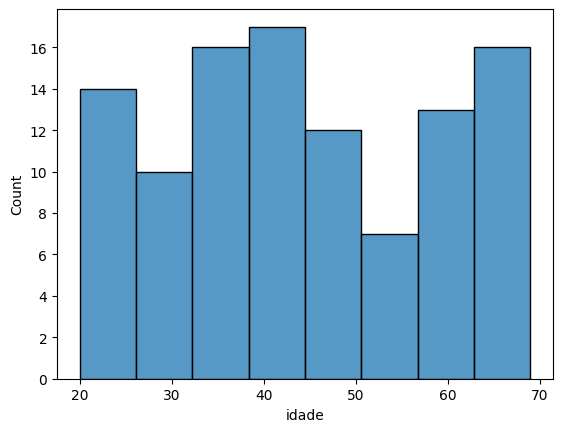

In [44]:
# Estatísticas descritivas
print("Estatísticas descritivas:\n", df.describe())

# Visualização de distribuições
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['idade'])
plt.show()

# Limpeza de Dados

## Remoção de Linhas/Colunas

In [45]:
# Remoção de linhas com muitos valores ausentes
df.dropna(thresh=len(df.columns) - 2, inplace=True)

# Remoção de colunas com muitos valores ausentes
#df.dropna(axis=1, thresh=len(df) - 2, inplace=True)


In [46]:
df

,id,idade,salario,experiencia,categoria,data_admissao,score
0,1,58,5387.211846,35,C,2000-07-31 00:00:00,33.125724
1,2,48,5159.052145,18,A,2002-03-31 00:00:00,69.228806
2,3,34,4347.905398,25,D,2000-06-30 00:00:00,49.573678
3,4,62,2112.638582,2,C,2006-03-31 00:00:00,24.253633
4,5,27,3590.739233,18,D,2006-09-30 00:00:00,34.355579
...,...,...,...,...,...,...,...
0,1,58,5387.211846,35,C,2000-07-31 00:00:00,33.125724
1,2,48,5159.052145,18,A,2002-03-31 00:00:00,69.228806
2,3,34,4347.905398,25,D,2000-06-30 00:00:00,49.573678
3,4,62,2112.638582,2,C,2006-03-31 00:00:00,24.253633


# Imputação

In [47]:
# Imputação com média
df['salario'].fillna(df['salario'].mean(), inplace=True)

# Imputação com moda
df['categoria'].fillna(df['categoria'].mode()[0], inplace=True)


# Remoção de Duplicatas

In [48]:
# Identificação e remoção de duplicatas
df.drop_duplicates(inplace=True)


## Correção de Valores Anômalos (Outliers)

### Remoção

In [49]:
# Remoção de outliers com base em um limiar
df = df[(df['score'] > 0) & (df['score'] < 100)]

### Transformação

In [50]:
# Aplicação de transformação logarítmica
df['score_log'] = np.log(df['score'] + 1)

### Substituição

In [51]:
# Substituição de outliers por um valor limite
upper_threshold = 20000
df.loc[df['salario'] > upper_threshold, 'salario'] = upper_threshold


## Correção de Erros de Digitação

In [52]:
# Correção de valores incorretos
df['categoria'] = df['categoria'].str.replace('erro', 'A')

## Normalização

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['salario_normalizado'] = scaler.fit_transform(df[['salario']])

## Padronização

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['score_padronizado'] = scaler.fit_transform(df[['score']])


## Correção de Inconsistências de Formato

### Uniformização de formato de datas

In [55]:
df['data_admissao'] = pd.to_datetime(df['data_admissao'], errors='coerce', format='%Y-%m-%d')

### Tratamento de valores nulos gerados pela conversão de datas

In [56]:
df['data_admissao'].fillna(pd.to_datetime('2000-01-01'), inplace=True)

### Transformação da data em características numéricas

In [57]:
df['ano_admissao'] = df['data_admissao'].dt.year
df['mes_admissao'] = df['data_admissao'].dt.month
df['dia_admissao'] = df['data_admissao'].dt.day

## Codificação e criação de features

### # One-Hot Encoding

In [58]:
df = pd.get_dummies(df, columns=['categoria'])

## Redução de dimensionalidade

### Preparação dos dados para PCA (selecionando apenas colunas numéricas)

In [59]:
features = ['idade', 'salario_normalizado', 'experiencia', 'score_padronizado', 'ano_admissao', 'mes_admissao', 'dia_admissao']
X = df[features]

### Aplicação do PCA

In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Exibição do dataset final

In [61]:
print("Dataset final:\n", df.head(10))

Dataset final:
    id  idade       salario  experiencia data_admissao      score  score_log  \
0   1     58   5387.211846           35    2000-07-31  33.125724   3.530051   
1   2     48   5159.052145           18    2002-03-31  69.228806   4.251759   
2   3     34   4347.905398           25    2000-06-30  49.573678   3.923431   
3   4     62   2112.638582            2    2006-03-31  24.253633   3.228970   
4   5     27   3590.739233           18    2006-09-30  34.355579   3.565456   
5   6     40  11327.331365           19    2007-10-31  69.897075   4.261229   
6   7     58  11327.331365           31    2006-12-31  56.729730   4.055772   
7   8     38  11327.331365            6    2005-05-31  48.819025   3.908397   
8   9     42  11327.331365           32    2001-03-31  16.748584   2.876306   
9  10     30  11327.331365           39    2006-01-31  70.843495   4.274490   

   salario_normalizado  score_padronizado  ano_admissao  mes_admissao  \
0             0.187991          -0.938381